In [1]:
import csv

# Define all file configs: input, output, and expected column count
files = [
    {
        "input": "book_ratings.dat",
        "output": "book_ratings.csv",
        "columns": ["user", "item", "rating"],
        "expected_columns": 3
    },
    {
        "input": "book_history.dat",
        "output": "book_history.csv",
        "columns": ["user", "item", "accessed"],
        "expected_columns": 3
    },
    {
        "input": "items_info.dat",
        "output": "items_info.csv",
        "columns": [
            "Book_ID", "ISBN", "Book-Title", "Book-Author",
            "Year-Of-Publication", "Publisher",
            "Image-URL-S", "Image-URL-M", "Image-URL-L"
        ],
        "expected_columns": 9
    },
    {
        "input": "users_info.dat",
        "output": "users_info.csv",
        "columns": ["User-ID", "Location", "Age"],
        "expected_columns": 3
    }
]

# Process each file
for f in files:
    parsed_rows = []

    with open(f["input"], "r", encoding="latin-1") as infile:
        lines = infile.readlines()

    # Skip header and process each line
    for line in lines[1:]:
        parts = line.strip().split("\t")
        if len(parts) == f["expected_columns"]:
            parsed_rows.append(parts)

    # Write cleaned CSV
    with open(f["output"], "w", newline="", encoding="utf-8") as outfile:
        writer = csv.writer(outfile)
        writer.writerow(f["columns"])
        writer.writerows(parsed_rows)

    print(f"✅ {f['input']} → {f['output']} | Rows: {len(parsed_rows)}")

✅ book_ratings.dat → book_ratings.csv | Rows: 62656
✅ book_history.dat → book_history.csv | Rows: 272678
✅ items_info.dat → items_info.csv | Rows: 16411
✅ users_info.dat → users_info.csv | Rows: 2946


In [2]:
import pandas as pd

# Load and preview each CSV
ratings = pd.read_csv("book_ratings.csv")
print("📘 book_ratings.csv:")
print(ratings.head(), "\n")

history = pd.read_csv("book_history.csv")
print("📂 book_history.csv:")
print(history.head(), "\n")

items = pd.read_csv("items_info.csv")
print("📚 items_info.csv:")
print(items.head(), "\n")

users = pd.read_csv("users_info.csv")
print("👥 users_info.csv:")
print(users.head())


C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


📘 book_ratings.csv:
   user  item  rating
0     1  6264     7.0
1     1  4350     7.0
2     1  6252     5.0
3     1   202     9.0
4     1  6266     6.0 

📂 book_history.csv:
   user  item  accessed
0     1   152         1
1     1   153         1
2     1  2176         1
3     1   154         1
4     1   734         1 

📚 items_info.csv:
   Book_ID        ISBN                                         Book-Title  \
0        1  0060973129                               Decision in Normandy   
1        3  0425176428  What If?: The World's Foremost Military Histor...   
2        4  0452264464               Beloved (Plume Contemporary Fiction)   
3        5  0609804618  Our Dumb Century: The Onion Presents 100 Years...   
4        7  1879384493  If I'd Known Then What I Know Now: Why Not Lea...   

     Book-Author  Year-Of-Publication                 Publisher  \
0   Carlo D'Este                 1991           HarperPerennial   
1  Robert Cowley                 2000  Berkley Publishing Group  

In [3]:
import pandas as pd
import numpy as np

# Load datasets
ratings = pd.read_csv('book_ratings.csv')
history = pd.read_csv('book_history.csv')
items = pd.read_csv('items_info.csv')
users = pd.read_csv('users_info.csv')

# 🔍 Step 1: Clean Ratings
ratings.drop_duplicates(inplace=True)
ratings = ratings.dropna(subset=['user', 'item', 'rating'])

# 🔍 Step 2: Clean History
history.drop_duplicates(inplace=True)
history = history.dropna(subset=['user', 'item', 'accessed'])

# 🔍 Step 3: Clean Items
items.drop_duplicates(subset=['Book_ID', 'ISBN'], inplace=True)

# Fix types
items['Year-Of-Publication'] = pd.to_numeric(items['Year-Of-Publication'], errors='coerce')
items['Year-Of-Publication'] = items['Year-Of-Publication'].fillna(0).astype(int)
items['Publisher'] = items['Publisher'].fillna('Unknown')
items['Book-Title'] = items['Book-Title'].fillna('Unknown')
items['Book-Author'] = items['Book-Author'].fillna('Unknown')

# 🔍 Step 4: Clean Users
users.drop_duplicates(inplace=True)
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')
users.loc[(users['Age'] < 10) | (users['Age'] > 90), 'Age'] = np.nan

# 🧾 Step 5: Print final structure
print("✅ Cleaned Shapes:")
print("Ratings:", ratings.shape)
print("History:", history.shape)
print("Items:", items.shape)
print("Users:", users.shape)

print("\n🔹 Ratings (head):")
print(ratings.head())

print("\n🔹 History (head):")
print(history.head())

print("\n🔹 Items (head):")
print(items[['Book_ID', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication']].head())

print("\n🔹 Users (head):")
print(users.head())


✅ Cleaned Shapes:
Ratings: (62656, 3)
History: (272678, 3)
Items: (16411, 9)
Users: (2946, 3)

🔹 Ratings (head):
   user  item  rating
0     1  6264     7.0
1     1  4350     7.0
2     1  6252     5.0
3     1   202     9.0
4     1  6266     6.0

🔹 History (head):
   user  item  accessed
0     1   152         1
1     1   153         1
2     1  2176         1
3     1   154         1
4     1   734         1

🔹 Items (head):
   Book_ID        ISBN                                         Book-Title  \
0        1  0060973129                               Decision in Normandy   
1        3  0425176428  What If?: The World's Foremost Military Histor...   
2        4  0452264464               Beloved (Plume Contemporary Fiction)   
3        5  0609804618  Our Dumb Century: The Onion Presents 100 Years...   
4        7  1879384493  If I'd Known Then What I Know Now: Why Not Lea...   

     Book-Author  Year-Of-Publication  
0   Carlo D'Este                 1991  
1  Robert Cowley                

## 📊 Exploratory Data Analysis (EDA)
### ✅ Step 1: Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ✅ Step 2: Ratings Distribution


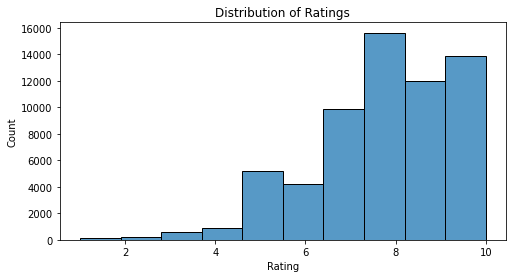

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


### ✅ Step 3: Top Rated Books (by count)

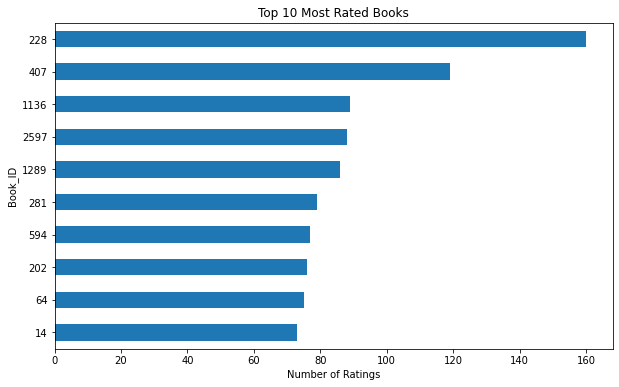

In [6]:
top_rated_books = ratings['item'].value_counts().head(10)
top_rated_info = items[items['Book_ID'].isin(top_rated_books.index)][['Book_ID', 'Book-Title']].set_index('Book_ID')
top_rated_info['num_ratings'] = top_rated_books
top_rated_info.sort_values('num_ratings', ascending=True).plot(kind='barh', figsize=(10, 6), legend=False)
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.show()


### ✅ Step 4: User Activity (Number of Ratings per User)

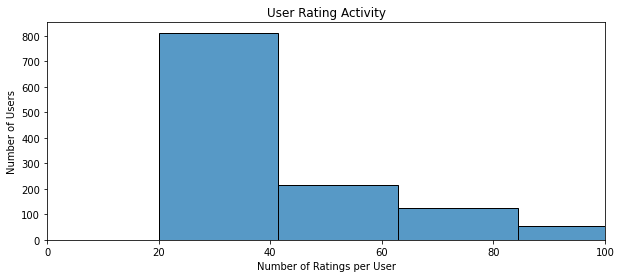

In [7]:
user_activity = ratings['user'].value_counts()
plt.figure(figsize=(10, 4))
sns.histplot(user_activity, bins=50)
plt.title("User Rating Activity")
plt.xlabel("Number of Ratings per User")
plt.ylabel("Number of Users")
plt.xlim(0, 100)
plt.show()

### ✅ Step 5: Age Distribution of Users

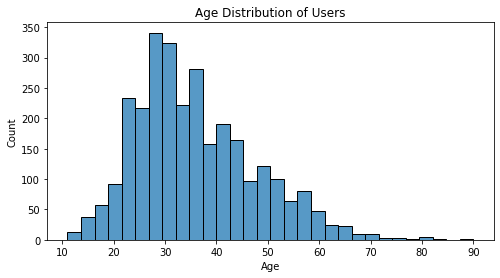

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(users['Age'].dropna(), bins=30)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### ✅ Step 6: Most Common Publishers 

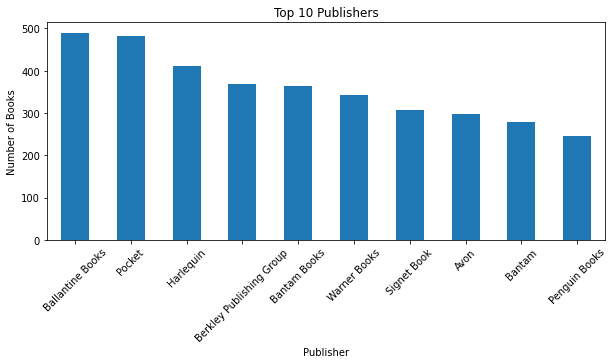

In [9]:
top_publishers = items['Publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', figsize=(10, 4))
plt.title("Top 10 Publishers")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.show()


### Create the User-Item Matrix for Collaborative Filtering

In [10]:
# Create user-item rating matrix (users as rows, items as columns)
user_item_matrix = ratings.pivot(index='user', columns='item', values='rating')

print("🔧 User-Item Matrix shape:", user_item_matrix.shape)
print("🔍 Sample User-Item Matrix (sparse):")
print(user_item_matrix.head())


🔧 User-Item Matrix shape: (1295, 14684)
🔍 Sample User-Item Matrix (sparse):
item  1      2      3      4      5      6      7      8      9      10     \
user                                                                         
1       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9       NaN    NaN    NaN    NaN    NaN    NaN    NaN    5.0    NaN    NaN   

item  ...  17367  17369  17370  17371  17372  17373  17374  17378  17379  \
user  ...                                                                  
1     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5     ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN 

## 🔧 Step-by-Step: User-Based Collaborative Filtering
### ✅ Goal:
* Recommend books to a user based on ratings given by similar users.

### 🧩 Step 1: Import Required Libraries

In [11]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np


### 🧩 Step 2: Create User-Item Rating Matrix

In [12]:
user_item_matrix = ratings.pivot(index='user', columns='item', values='rating')

### 🧩 Step 3: Compute User-User Similarity (Cosine)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Replace NaN with 0 temporarily just to compute similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


### 🧩 Step 4: Predict a Missing Rating for a Given User-Item Pair
* Use weighted sum of ratings from similar users who rated that item.

In [14]:
def predict_rating(user_id, item_id, k=5):
    # Get users who rated the item
    item_ratings = user_item_matrix[item_id].dropna()
    if item_ratings.empty:
        return np.nan  # No one rated this item

    # Similarities of these users to the target user
    sim_scores = user_similarity_df.loc[user_id, item_ratings.index]

    # Pick top-k similar users
    top_k_users = sim_scores.sort_values(ascending=False).head(k)

    # Their ratings
    top_ratings = item_ratings[top_k_users.index]

    # Weighted average
    if top_k_users.sum() == 0:
        return np.nan  # Avoid division by zero
    predicted_rating = np.dot(top_k_users, top_ratings) / top_k_users.sum()

    return predicted_rating


### ✅ 5: Apply the Function to Predict Some Ratings


In [15]:
# Predict rating for user 1 and item 10 (only if missing)
if pd.isna(user_item_matrix.loc[1, 10]):
    pred = predict_rating(1, 10)
    print(f"Predicted rating for User 1 on Item 10: {pred:.2f}")


Predicted rating for User 1 on Item 10: 9.19


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Split the ratings DataFrame
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# Step 2: Create the user-item matrix from train data
train_matrix = train_data.pivot(index='user', columns='item', values='rating')

# Dummy predict function (replace with your UBCF logic)
def predict_rating(user_id, item_id, k=5):
    # Simple user-based CF example using mean rating of the user
    if user_id in train_matrix.index:
        user_ratings = train_matrix.loc[user_id]
        if not np.isnan(user_ratings.mean()):
            return user_ratings.mean()
    return np.nan

# Step 3: Evaluate predictions
preds = []
actuals = []

for _, row in test_data.iterrows():
    user, item, actual = row['user'], row['item'], row['rating']
    if user in train_matrix.index and item in train_matrix.columns:
        pred = predict_rating(user, item)
        if not np.isnan(pred):
            preds.append(pred)
            actuals.append(actual)

# Step 4: Calculate RMSE
rmse = np.sqrt(mean_squared_error(actuals, preds))
print(f"User-Based CF RMSE: {rmse:.4f}")


User-Based CF RMSE: 1.4998


### ✅ Step 1: Create Item-User Matrix from Training Data

In [17]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

# Load your ratings data if not already loaded
# ratings_df = pd.read_csv("book_ratings.csv")

# Split into train and test
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# Create item-user matrix from training data
item_user_matrix = train_data.pivot_table(index='item', columns='user', values='rating')


### ✅ Step 2: Compute Item Similarity

In [18]:
# Fill missing values with 0 (for similarity computation only)
item_user_filled = item_user_matrix.fillna(0)

# Compute cosine similarity
item_similarity = cosine_similarity(item_user_filled)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)


### ✅ Step 3: Predict Ratings

In [19]:
def predict_rating_item_based(user_id, item_id):
    if item_id not in item_similarity_df.index or user_id not in item_user_matrix.columns:
        return None
    
    # Get similarities for the item
    sim_scores = item_similarity_df[item_id]
    
    # Get ratings from the user for all items
    user_ratings = item_user_matrix[user_id]
    
    # Align indices
    common_items = user_ratings.dropna().index.intersection(sim_scores.index)
    
    if len(common_items) == 0:
        return None
    
    sim_scores = sim_scores[common_items]
    user_ratings = user_ratings[common_items]
    
    numerator = (sim_scores * user_ratings).sum()
    denominator = sim_scores.sum()
    
    if denominator == 0:
        return None
    
    return numerator / denominator


### ✅ Step 4: Evaluate Model on Test Data

In [20]:
actual = []
predicted = []

for _, row in test_data.iterrows():
    pred = predict_rating_item_based(row['user'], row['item'])
    if pred is not None:
        actual.append(row['rating'])
        predicted.append(pred)

# Compute RMSE
rmse = sqrt(mean_squared_error(actual, predicted))
print("📚 Item-Based CF RMSE:", round(rmse, 4))


📚 Item-Based CF RMSE: 1.5979


 ### 1. KNN with Cosine Similarity
* Goal: Memory-based collaborative filtering using KNN

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Create user-item matrix (ratings_df should already be available)
user_item_matrix = ratings.pivot(index="user", columns="item", values="rating")

# Step 2: Fill NaN temporarily for KNN to work — using mean imputation (only for distance calc)
imputer = KNNImputer(n_neighbors=5)
user_item_imputed = imputer.fit_transform(user_item_matrix)

# Step 3: Rebuild dataframe
user_item_imputed_df = pd.DataFrame(user_item_imputed, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Step 4: Cosine similarity between users
user_similarity = cosine_similarity(user_item_imputed_df)

# Step 5: Predict ratings using weighted average
def predict_rating(user_index, item_index, k=5):
    sim_scores = user_similarity[user_index]
    item_ratings = user_item_matrix.iloc[:, item_index]

    # Get indices of top k similar users
    top_k_users = np.argsort(sim_scores)[-k:]

    weighted_sum = 0
    sim_sum = 0
    for idx in top_k_users:
        rating = item_ratings.iloc[idx]
        if not np.isnan(rating):
            weighted_sum += sim_scores[idx] * rating
            sim_sum += abs(sim_scores[idx])
    
    return weighted_sum / sim_sum if sim_sum > 0 else np.nan

# Optional: Evaluate on a test set


### Matrix Factorization – SVD (Surprise Library)

In [25]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, GridSearchCV

# Step 1: Prepare data for Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[["user", "item", "rating"]], reader)

# Step 2: Grid Search for tuning
param_grid = {
    "n_factors": [20, 50],
    "lr_all": [0.005, 0.01],
    "reg_all": [0.1, 0.2]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=3)
gs.fit(data)

print("✅ Best RMSE:", gs.best_score["rmse"])
print("✅ Best Params:", gs.best_params["rmse"])

# Step 3: Train best model
best_model = gs.best_estimator["rmse"]
trainset = data.build_full_trainset()
best_model.fit(trainset)

# Optional: Predict specific rating
best_model.predict(uid=1, iid=6264)


✅ Best RMSE: 1.4819061648729583
✅ Best Params: {'n_factors': 20, 'lr_all': 0.005, 'reg_all': 0.1}


Prediction(uid=1, iid=6264, r_ui=None, est=8.061259960378234, details={'was_impossible': False})

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Step 1: Load full items_info.csv
items_df = pd.read_csv("items_info.csv")

# Step 2: Combine metadata fields into one string
items_df["metadata"] = (
    items_df["Book-Title"].fillna("") + " " +
    items_df["Book-Author"].fillna("") + " " +
    items_df["Publisher"].fillna("")
)

# Step 3: Apply TF-IDF on combined metadata
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(items_df["metadata"])

# Step 4: Compute cosine similarity between all books
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Step 5: Create title-to-index mapping
indices = pd.Series(items_df.index, index=items_df["Book-Title"]).drop_duplicates()

# Step 6: Define the recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices.get(title)
    if idx is None:
        print("Book not found in dataset.")
        return pd.DataFrame()
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    book_indices = [i[0] for i in sim_scores]
    
    return items_df[["Book-Title", "Book-Author", "Publisher"]].iloc[book_indices].reset_index(drop=True)

# Step 7: Try it on a sample book
get_recommendations("Beloved (Plume Contemporary Fiction)")


,Book-Title,Book-Author,Publisher
0,Jazz (Plume Contemporary Fiction),Toni Morrison,Plume Books
1,Paradise,Toni Morrison,Plume Books
2,Beloved,Toni Morrison,Vintage Books
3,Sula,Toni Morrison,Plume Books
4,Beloved,TONI MORRISON,Knopf
5,Tar Baby,Toni Morrison,Plume Books
6,Beloved,Toni Morrison,New Amer Library
7,Beloved : Gift Edition,TONI MORRISON,Knopf
8,Praisesong for the Widow (Plume Contemporary F...,Paule Marshall,Plume Books
9,A Wild Sheep Chase: A Novel (Plume Contemporar...,Haruki Murakami,Plume Books


 ## Task 4: Content-Based Filtering Implementation

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# Step 1: Load items_info.csv
items_df = pd.read_csv("items_info.csv")

# Fill missing values
items_df["Book-Title"] = items_df["Book-Title"].fillna("")
items_df["Book-Author"] = items_df["Book-Author"].fillna("")
items_df["Publisher"] = items_df["Publisher"].fillna("")
items_df["Year-Of-Publication"] = pd.to_numeric(items_df["Year-Of-Publication"], errors="coerce").fillna(0)

# Step 2: TF-IDF on Book-Title
tfidf_title = TfidfVectorizer(stop_words="english")
tfidf_matrix_title = tfidf_title.fit_transform(items_df["Book-Title"])

# Step 3: One-hot encode Author and Publisher
encoder = OneHotEncoder(handle_unknown="ignore", sparse=True)
encoded_features = encoder.fit_transform(items_df[["Book-Author", "Publisher"]])

# Step 4: Scale the Year
scaler = MinMaxScaler()
year_scaled = scaler.fit_transform(items_df[["Year-Of-Publication"]])

# Step 5: Combine all features
combined_features = hstack([tfidf_matrix_title, encoded_features, year_scaled])

# Step 6: Compute cosine similarity
cosine_sim = cosine_similarity(combined_features, combined_features)

# Step 7: Title-to-index mapping
indices = pd.Series(items_df.index, index=items_df["Book-Title"]).drop_duplicates()

# Step 8: Recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    matches = indices[indices.index.str.lower() == title.lower()]
    
    if matches.empty:
        print("Book not found in dataset.")
        return pd.DataFrame()
    
    idx = matches.iloc[0]  # Take the first match

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    book_indices = [i[0] for i in sim_scores]
    
    return items_df[["Book-Title", "Book-Author", "Publisher"]].iloc[book_indices].reset_index(drop=True)
# Example Usage
print(get_recommendations("Beloved"))


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                                   Book-Title      Book-Author    Publisher
0                              You're the One       Judi McCoy  Zebra Books
1                             Not Without You   Janelle Taylor  Zebra Books
2                                 Lady Killer     Meryl Sawyer  Zebra Books
3                  The Sexiest Dead Man Alive   Jane Blackwood  Zebra Books
4                             The Last to Die   Beverly Barton  Zebra Books
5                        An Improper Proposal     Cheryl Bolen  Zebra Books
6                        Match Made in Heaven       Judi McCoy  Zebra Books
7  To Tame a Rebel (Zebra Historical Romance)  Georgina Gentry  Zebra Books
8                          The Future Scrolls    Fern Michaels  Zebra Books
9                                  About Face    Fern Michaels  Zebra Books


### Hybrid Recommender

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# ---------- Load Content Metadata ----------
items_df = pd.read_csv("items_info.csv")

items_df["metadata"] = (
    items_df["Book-Title"].fillna("") + " " +
    items_df["Book-Author"].fillna("") + " " +
    items_df["Publisher"].fillna("")
)

# TF-IDF & cosine similarity
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(items_df["metadata"])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(items_df.index, index=items_df["Book-Title"]).drop_duplicates()

# ---------- Train Collaborative Filtering (SVD) ----------
ratings_df = pd.read_csv("book_ratings.csv")  # Ensure it has columns: user, item, rating

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_df[["user", "item", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd_model = SVD()
svd_model.fit(trainset)

# ---------- Hybrid Recommender Function ----------
def hybrid_recommendations(title, user_id, top_n=10):
    if title not in indices:
        print("Book not found.")
        return pd.DataFrame()

    # Content-based scores
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Predict SVD score for each similar book
    hybrid_scores = []
    for i, sim in sim_scores[1:]:
        book_id = items_df.iloc[i]["Book_ID"]
        try:
            pred_rating = svd_model.predict(user_id, book_id).est
            final_score = sim * pred_rating
            hybrid_scores.append((i, final_score))
        except:
            continue

    # Top N recommendations
    hybrid_scores = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)[:top_n]
    indices_top = [i[0] for i in hybrid_scores]
    return items_df[["Book-Title", "Book-Author", "Publisher"]].iloc[indices_top].reset_index(drop=True)

# ---------- Try it out ----------
hybrid_recommendations("Beloved (Plume Contemporary Fiction)", user_id=1)


,Book-Title,Book-Author,Publisher
0,Jazz (Plume Contemporary Fiction),Toni Morrison,Plume Books
1,Paradise,Toni Morrison,Plume Books
2,Beloved,Toni Morrison,Vintage Books
3,Beloved,TONI MORRISON,Knopf
4,Tar Baby,Toni Morrison,Plume Books
5,Sula,Toni Morrison,Plume Books
6,Beloved,Toni Morrison,New Amer Library
7,Beloved : Gift Edition,TONI MORRISON,Knopf
8,Praisesong for the Widow (Plume Contemporary F...,Paule Marshall,Plume Books
9,A Wild Sheep Chase: A Novel (Plume Contemporar...,Haruki Murakami,Plume Books


In [29]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load data
ratings_df = pd.read_csv("book_ratings.csv")
items_df = pd.read_csv("items_info.csv")

# Step 2: SVD Collaborative Filtering
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_df[['user', 'item', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD()
svd.fit(trainset)

# Add SVD predictions
ratings_df['pred_svd'] = ratings_df.apply(lambda row: svd.predict(row['user'], row['item']).est, axis=1)

# Step 3: TF-IDF Content-Based Filtering
items_df["metadata"] = (
    items_df["Book-Title"].fillna("") + " " +
    items_df["Book-Author"].fillna("") + " " +
    items_df["Publisher"].fillna("")
)

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(items_df["metadata"])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Title index mapping
title_to_index = pd.Series(items_df.index, index=items_df["Book-Title"].str.lower()).drop_duplicates()
id_to_title = dict(zip(items_df["Book_ID"], items_df["Book-Title"]))

# Function to get content score
def get_content_score(item_id):
    title = id_to_title.get(item_id, "").lower()
    idx = title_to_index.get(title)
    if idx is None:
        return 0
    return cosine_sim[idx].mean()

# Add content score
ratings_df["content_score"] = ratings_df["item"].apply(get_content_score)

# Step 4: Train Hybrid Meta-Model
X = ratings_df[["pred_svd", "content_score"]]
y = ratings_df["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"📊 Hybrid Meta-Model (Logistic Regression) RMSE: {rmse:.4f}")


📊 Hybrid Meta-Model (Logistic Regression) RMSE: 0.8367
